<a href="https://colab.research.google.com/github/harishsundaram07/KnowledgeDiscoveryInDatabases_Group4_Project/blob/main/KDD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 4:

1.  Harikrishnan Sundaram
2.  Malhar Joshi
3. Yash Chaudhari
4. Dhruv Jani
****

#**AIM OF THE PROJECT:**
To draw insights from a Tennis dataset w.r.t players age and correlation with the win and loss trend and analyzing the change in participation and performance of the tennis players from major countries like USA, UK, etc. In the earlier days of Tennis, the players would retire by the age of 30, but in recent times, the players have been playing at the age of around 35 and performing well. We will be analyzing the change in the pattern of participation Among the tennis players.
****
#**RESEARCH QUESTIONS:**
1.	What is the win percentage of players having the age in the range of 20-25, 25-30, 30-35 vs 35 and above for male and female players?
2.	What is the different winning percentage of a player from a specific country on different surfaces? 
3.	The percentage of wins between players from the US vs other popular countries and between age groups ranging from 20-25, 25-30, 30-35 vs 35 and above. 
4.	What factor is influencing the change in the trend of all male and female players winning the championship? If it's the surface, the age, or some other reason.
****
#**ANALYSIS:**
For this project we will be using **Descriptive Analysis**.
Descriptive analysis is the process of using statistical techniques to describe or summarize a set of data. It is popular for its ability to generate accessible insights from otherwise uninterpreted data.

****



Export the zip file and place all the dataset in the directory.



#**Importing all necessary libraries**

In [ ]:
import pandas as pd
from glob import glob

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

mpl.rcParams['figure.figsize'] = (20,8)
mpl.rcParams['axes.grid'] = False

#**Reading all the datafiles for the male players**

In [ ]:
male_files = glob("atp*")

In [ ]:
male_files

['atp_matches_1978.csv',
 'atp_matches_2021.csv',
 'atp_matches_2006.csv',
 'atp_matches_1994.csv',
 'atp_matches_2000.csv',
 'atp_matches_1988.csv',
 'atp_matches_1996.csv',
 'atp_matches_1975.csv',
 'atp_matches_2007.csv',
 'atp_matches_1971.csv',
 'atp_matches_1979.csv',
 'atp_matches_1992.csv',
 'atp_matches_2020.csv',
 'atp_matches_2015.csv',
 'atp_matches_2002.csv',
 'atp_matches_1976.csv',
 'atp_matches_1977.csv',
 'atp_matches_1981.csv',
 'atp_matches_1970.csv',
 'atp_matches_1980.csv',
 'atp_matches_2005.csv',
 'atp_matches_2001.csv',
 'atp_matches_1999.csv',
 'atp_matches_1998.csv',
 'atp_matches_1984.csv',
 'atp_matches_2013.csv',
 'atp_matches_1995.csv',
 'atp_matches_2012.csv',
 'atp_matches_2009.csv',
 'atp_matches_2019.csv',
 'atp_matches_2011.csv',
 'atp_matches_1972.csv',
 'atp_matches_2018.csv',
 'atp_matches_1973.csv',
 'atp_matches_1985.csv',
 'atp_matches_1983.csv',
 'atp_matches_2017.csv',
 'atp_matches_2003.csv',
 'atp_matches_2008.csv',
 'atp_matches_1990.csv',


#**Sorting the datafiles according to the year**

In [ ]:
male_files.sort()
male_files

['atp_matches_1970.csv',
 'atp_matches_1971.csv',
 'atp_matches_1972.csv',
 'atp_matches_1973.csv',
 'atp_matches_1974.csv',
 'atp_matches_1975.csv',
 'atp_matches_1976.csv',
 'atp_matches_1977.csv',
 'atp_matches_1978.csv',
 'atp_matches_1979.csv',
 'atp_matches_1980.csv',
 'atp_matches_1981.csv',
 'atp_matches_1982.csv',
 'atp_matches_1983.csv',
 'atp_matches_1984.csv',
 'atp_matches_1985.csv',
 'atp_matches_1986.csv',
 'atp_matches_1987.csv',
 'atp_matches_1988.csv',
 'atp_matches_1989.csv',
 'atp_matches_1990.csv',
 'atp_matches_1991.csv',
 'atp_matches_1992.csv',
 'atp_matches_1993.csv',
 'atp_matches_1994.csv',
 'atp_matches_1995.csv',
 'atp_matches_1996.csv',
 'atp_matches_1997.csv',
 'atp_matches_1998.csv',
 'atp_matches_1999.csv',
 'atp_matches_2000.csv',
 'atp_matches_2001.csv',
 'atp_matches_2002.csv',
 'atp_matches_2003.csv',
 'atp_matches_2004.csv',
 'atp_matches_2005.csv',
 'atp_matches_2006.csv',
 'atp_matches_2007.csv',
 'atp_matches_2008.csv',
 'atp_matches_2009.csv',


#**Concatinating all the male players datafiles into a single dataframe**

In [ ]:
male_data = pd.concat ((pd.read_csv(file) for file in male_files), ignore_index= True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**The final male players dataset:**

In [ ]:
male_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-2029,Dublin,Grass,32,A,19700706,271,100106,NaN,NaN,Graham Stilwell,R,173.0,GBR,24.637919,125672,NaN,NaN,Kenneth Reid,U,NaN,IRL,NaN,6-0 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-2029,Dublin,Grass,32,A,19700706,272,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,209675,NaN,NaN,B Sweeney,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-2029,Dublin,Grass,32,A,19700706,273,100100,NaN,NaN,Tony Roche,L,178.0,AUS,25.136208,125716,NaN,NaN,James Buckley,U,NaN,IRL,33.223819,6-0 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-2029,Dublin,Grass,32,A,19700706,274,100060,NaN,NaN,Marty Riessen,R,185.0,USA,28.585900,209674,NaN,NaN,Frank Mcardle,U,NaN,IRL,NaN,6-1 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-2029,Dublin,Grass,32,A,19700706,275,100084,NaN,NaN,Tom Okker,R,178.0,NED,26.368241,209673,NaN,NaN,T Grane,U,NaN,NaN,NaN,6-2 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
male_data.shape

(176458, 49)

#**Reading all the datafiles for the female players**

In [ ]:
female_files = glob("wta*")

In [ ]:
female_files

['wta_matches_2005.csv',
 'wta_matches_2020.csv',
 'wta_matches_2021.csv',
 'wta_matches_2014.csv',
 'wta_matches_1992.csv',
 'wta_matches_1996.csv',
 'wta_matches_2015.csv',
 'wta_matches_1982.csv',
 'wta_matches_1999.csv',
 'wta_matches_1974.csv',
 'wta_matches_1979.csv',
 'wta_matches_1976.csv',
 'wta_matches_2016.csv',
 'wta_matches_1977.csv',
 'wta_matches_1970.csv',
 'wta_matches_1978.csv',
 'wta_matches_2012.csv',
 'wta_matches_1988.csv',
 'wta_matches_2013.csv',
 'wta_matches_1986.csv',
 'wta_matches_1983.csv',
 'wta_matches_1972.csv',
 'wta_matches_1991.csv',
 'wta_matches_1971.csv',
 'wta_matches_2017.csv',
 'wta_matches_1994.csv',
 'wta_matches_2018.csv',
 'wta_matches_1975.csv',
 'wta_matches_2011.csv',
 'wta_matches_2004.csv',
 'wta_matches_2002.csv',
 'wta_matches_1985.csv',
 'wta_matches_1980.csv',
 'wta_matches_1989.csv',
 'wta_matches_2010.csv',
 'wta_matches_2000.csv',
 'wta_matches_1998.csv',
 'wta_matches_2007.csv',
 'wta_matches_2008.csv',
 'wta_matches_1981.csv',


#**Sorting the datafiles according to the year**

In [ ]:
female_files.sort()
female_files

['wta_matches_1970.csv',
 'wta_matches_1971.csv',
 'wta_matches_1972.csv',
 'wta_matches_1973.csv',
 'wta_matches_1974.csv',
 'wta_matches_1975.csv',
 'wta_matches_1976.csv',
 'wta_matches_1977.csv',
 'wta_matches_1978.csv',
 'wta_matches_1979.csv',
 'wta_matches_1980.csv',
 'wta_matches_1981.csv',
 'wta_matches_1982.csv',
 'wta_matches_1983.csv',
 'wta_matches_1984.csv',
 'wta_matches_1985.csv',
 'wta_matches_1986.csv',
 'wta_matches_1987.csv',
 'wta_matches_1988.csv',
 'wta_matches_1989.csv',
 'wta_matches_1990.csv',
 'wta_matches_1991.csv',
 'wta_matches_1992.csv',
 'wta_matches_1993.csv',
 'wta_matches_1994.csv',
 'wta_matches_1995.csv',
 'wta_matches_1996.csv',
 'wta_matches_1997.csv',
 'wta_matches_1998.csv',
 'wta_matches_1999.csv',
 'wta_matches_2000.csv',
 'wta_matches_2001.csv',
 'wta_matches_2002.csv',
 'wta_matches_2003.csv',
 'wta_matches_2004.csv',
 'wta_matches_2005.csv',
 'wta_matches_2006.csv',
 'wta_matches_2007.csv',
 'wta_matches_2008.csv',
 'wta_matches_2009.csv',


#**Concatinating all the female players datafiles into a single dataframe**

In [ ]:
female_data = pd.concat ((pd.read_csv(file) for file in female_files), ignore_index= True)

#**The final female players dataset:**

In [ ]:
female_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,1,200198,NaN,NaN,Caroline Langsford,U,NaN,AUS,NaN,200199,NaN,NaN,Sally Irvine,U,NaN,AUS,NaN,6-3 6-2,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,2,200188,NaN,NaN,Helen Amos,U,NaN,AUS,21.555099,200172,NaN,NaN,Caroline Cooper,U,NaN,AUS,NaN,6-0 6-3,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,3,200200,NaN,NaN,Norma Marsh,U,NaN,AUS,34.017796,200201,NaN,NaN,Sharon Thomson,U,NaN,AUS,NaN,6-2 7-5,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,4,200203,NaN,NaN,Vicki Lancaster Kerr,U,NaN,AUS,18.981520,200202,NaN,NaN,Theresa Van Haren,U,NaN,AUS,NaN,6-1 6-1,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,5,200204,NaN,NaN,Sandra Walsham,U,NaN,AUS,NaN,200205,NaN,NaN,Judy Harris,U,NaN,AUS,NaN,7-5 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
female_data.shape

(143757, 49)

#**Data Preprocessing Steps**
**Below are the established steps we’ll need to go through to make sure our data is successfully preprocessed.**

**1. Data quality assessment**

**2. Data cleaning**

**3. Data reduction**

**1. Data quality assessment**

First we take a good look at our data and get an idea of its overall quality, relevance to our project, and consistency. There are a number of data anomalies and inherent problems to look out for in almost any data set, for example:

Mismatched data types: When you collect data from many different sources, it may come to you in different formats.

Mixed data values: Perhaps different sources use different descriptors for features – for example, man or male. These value descriptors should all be made uniform.

Data outliers: Outliers can have a huge impact on data analysis results.

Missing data: Take a look for missing data fields, blank spaces in text, or unanswered survey questions. This could be due to human error or incomplete data. To take care of missing data, you’ll have to perform data cleaning.


Since all our data comes from a single source we can conclude that there are no inconsistencies with respect to the quality, data types and data values.

**2. Data cleaning**

Data cleaning is the process of adding missing data and correcting, repairing, or removing incorrect or irrelevant data from a data set. Dating cleaning is the most important step of preprocessing because it will ensure that your data is ready to go for your downstream needs.

Data cleaning will correct all of the inconsistent data you uncovered in your data quality assessment. Depending on the kind of data you’re working with, there are a number of possible cleaners you’ll need to run your data through.

Missing data
There are a number of ways to correct for missing data, but the two most common are:

Ignore the tuples: A tuple is an ordered list or sequence of numbers or entities. If multiple values are missing within tuples, you may simply discard the tuples with that missing information. This is only recommended for large data sets, when a few ignored tuples won’t harm further analysis.

Manually fill in missing data: This can be tedious, but is definitely necessary when working with smaller data sets.


#**Let us check our datasets for any missing data.**

In [ ]:
missing_male_data = male_data.isnull()
missing_male_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
missing_female_data = female_data.isnull()
missing_female_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


**We can see from the above values that our datasets contain null values which could be harmful for our analysis.**

**Lets see the count of the null values for each columns and then find the overall percentage of those null values.**


**First lets do it for the Male players dataframe**

In [ ]:
sum_missing_male_data = missing_male_data.sum()
sum_missing_male_data

tourney_id                 0
tourney_name               0
surface                 2489
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           109158
winner_entry          160799
winner_name                0
winner_hand               43
winner_ht              18033
winner_ioc                 7
winner_age              1691
loser_id                   0
loser_seed            142288
loser_entry           149800
loser_name                 0
loser_hand               107
loser_ht               30144
loser_ioc                 33
loser_age               4865
score                     11
best_of                    0
round                      0
minutes                90111
w_ace                  87506
w_df                   87506
w_svpt                 87506
w_1stIn                87506
w_1stWon               87506
w_2ndWon               87506
w_SvGms                87505
w_bpSaved     

In [ ]:
len(male_data)

176458

In [ ]:
percentage_missing_male_data = (sum_missing_male_data / len(male_data))*100
percentage_missing_male_data

tourney_id             0.000000
tourney_name           0.000000
surface                1.410534
draw_size              0.000000
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_seed           61.860613
winner_entry          91.125934
winner_name            0.000000
winner_hand            0.024368
winner_ht             10.219429
winner_ioc             0.003967
winner_age             0.958302
loser_id               0.000000
loser_seed            80.635619
loser_entry           84.892722
loser_name             0.000000
loser_hand             0.060638
loser_ht              17.082819
loser_ioc              0.018701
loser_age              2.757030
score                  0.006234
best_of                0.000000
round                  0.000000
minutes               51.066543
w_ace                 49.590271
w_df                  49.590271
w_svpt                49.590271
w_1stIn               49.590271
w_1stWon

**Now for the female players dataframe**

In [ ]:
sum_missing_female_data = missing_female_data.sum()
sum_missing_female_data

tourney_id                 0
tourney_name               0
surface                 4683
draw_size              16915
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed            87554
winner_entry          131635
winner_name                0
winner_hand                0
winner_ht              82771
winner_ioc                25
winner_age              2258
loser_id                   0
loser_seed            116760
loser_entry           123256
loser_name                 0
loser_hand                 0
loser_ht               98003
loser_ioc                141
loser_age               6093
score                      1
best_of                    0
round                      0
minutes               129233
w_ace                 107702
w_df                  107559
w_svpt                107700
w_1stIn               107700
w_1stWon              107700
w_2ndWon              107700
w_SvGms               127545
w_bpSaved     

In [ ]:
len(female_data)

143757

In [ ]:
percentage_missing_female_data = (sum_missing_female_data / len(female_data))*100
percentage_missing_female_data

tourney_id             0.000000
tourney_name           0.000000
surface                3.257581
draw_size             11.766384
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_seed           60.904165
winner_entry          91.567715
winner_name            0.000000
winner_hand            0.000000
winner_ht             57.577022
winner_ioc             0.017390
winner_age             1.570706
loser_id               0.000000
loser_seed            81.220393
loser_entry           85.739129
loser_name             0.000000
loser_hand             0.000000
loser_ht              68.172680
loser_ioc              0.098082
loser_age              4.238402
score                  0.000696
best_of                0.000000
round                  0.000000
minutes               89.896840
w_ace                 74.919482
w_df                  74.820009
w_svpt                74.918091
w_1stIn               74.918091
w_1stWon

**From the above analysis we can see that there are many columns in both the datafarmes with very high percentage of missing data. We will now drop those columns from the dataframes.**

In [ ]:
male_perc = 50.0
male_min_count = int(((100-male_perc)/100)*male_data.shape[0] + 1)
new_male_data = male_data.dropna( axis=1, 
                thresh=male_min_count)

female_perc = 70.0
female_min_count = int(((100-female_perc)/100)*female_data.shape[0] + 1)
new_female_data = female_data.dropna(axis =1, thresh = female_min_count)

In [ ]:
new_male_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-2029,Dublin,Grass,32,A,19700706,271,100106,Graham Stilwell,R,173.0,GBR,24.637919,125672,Kenneth Reid,U,NaN,IRL,NaN,6-0 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-2029,Dublin,Grass,32,A,19700706,272,209533,Harry Sheridan,U,NaN,IRL,NaN,209675,B Sweeney,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-2029,Dublin,Grass,32,A,19700706,273,100100,Tony Roche,L,178.0,AUS,25.136208,125716,James Buckley,U,NaN,IRL,33.223819,6-0 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-2029,Dublin,Grass,32,A,19700706,274,100060,Marty Riessen,R,185.0,USA,28.585900,209674,Frank Mcardle,U,NaN,IRL,NaN,6-1 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-2029,Dublin,Grass,32,A,19700706,275,100084,Tom Okker,R,178.0,NED,26.368241,209673,T Grane,U,NaN,NaN,NaN,6-2 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_male_data.shape

(176458, 44)

In [ ]:
new_female_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,1,200198,NaN,Caroline Langsford,U,NaN,AUS,NaN,200199,Sally Irvine,U,NaN,AUS,NaN,6-3 6-2,3,R64,NaN,NaN,NaN,NaN
1,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,2,200188,NaN,Helen Amos,U,NaN,AUS,21.555099,200172,Caroline Cooper,U,NaN,AUS,NaN,6-0 6-3,3,R64,NaN,NaN,NaN,NaN
2,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,3,200200,NaN,Norma Marsh,U,NaN,AUS,34.017796,200201,Sharon Thomson,U,NaN,AUS,NaN,6-2 7-5,3,R64,NaN,NaN,NaN,NaN
3,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,4,200203,NaN,Vicki Lancaster Kerr,U,NaN,AUS,18.981520,200202,Theresa Van Haren,U,NaN,AUS,NaN,6-1 6-1,3,R64,NaN,NaN,NaN,NaN
4,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,5,200204,NaN,Sandra Walsham,U,NaN,AUS,NaN,200205,Judy Harris,U,NaN,AUS,NaN,7-5 6-4,3,R64,NaN,NaN,NaN,NaN


In [ ]:
new_female_data.shape

(143757, 27)

**There are some columns with missing data which are useful for our analysis. Let us fill those columns with either a string or mean of the values in those columns.**

In [ ]:
percentage_missing_male_data

tourney_id             0.000000
tourney_name           0.000000
surface                1.410534
draw_size              0.000000
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_seed           61.860613
winner_entry          91.125934
winner_name            0.000000
winner_hand            0.024368
winner_ht             10.219429
winner_ioc             0.003967
winner_age             0.958302
loser_id               0.000000
loser_seed            80.635619
loser_entry           84.892722
loser_name             0.000000
loser_hand             0.060638
loser_ht              17.082819
loser_ioc              0.018701
loser_age              2.757030
score                  0.006234
best_of                0.000000
round                  0.000000
minutes               51.066543
w_ace                 49.590271
w_df                  49.590271
w_svpt                49.590271
w_1stIn               49.590271
w_1stWon

#**Changed the null values in Surface column  to 'Not Mentioned'**

In [ ]:
new_male_data.surface.fillna('Not Mentioned', inplace=True)
new_male_data.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
176453,2021-9410,Nur-Sultan,Hard,32,A,20210920,276,207518,Lorenzo Musetti,R,185.0,ITA,19.550992,117360,Marc Polmans,R,NaN,AUS,24.386037,6-4 2-6 6-4,3,R32,4.0,5.0,82.0,49.0,30.0,15.0,14.0,5.0,10.0,0.0,2.0,85.0,55.0,37.0,11.0,14.0,4.0,9.0,57.0,1108.0,165.0,437.0
176454,2021-9410,Nur-Sultan,Hard,32,A,20210920,275,126952,Soon Woo Kwon,R,180.0,KOR,23.800137,105539,Evgeny Donskoy,R,185.0,RUS,31.367556,6-4 6-3,3,R32,6.0,0.0,52.0,31.0,24.0,15.0,9.0,0.0,0.0,2.0,1.0,63.0,33.0,21.0,15.0,10.0,3.0,6.0,82.0,899.0,150.0,498.0
176455,2021-9410,Nur-Sultan,Hard,32,A,20210920,273,106078,Egor Gerasimov,R,196.0,BLR,28.856947,105332,Benoit Paire,R,196.0,FRA,32.369610,7-5 6-4,3,R32,2.0,4.0,69.0,48.0,33.0,9.0,11.0,2.0,5.0,6.0,5.0,68.0,41.0,31.0,6.0,11.0,4.0,9.0,97.0,769.0,53.0,1295.0
176456,2021-9410,Nur-Sultan,Hard,32,A,20210920,272,126535,Carlos Taberner,R,NaN,ESP,24.117728,105575,Ricardas Berankis,R,175.0,LTU,31.249829,7-5 6-4,3,R32,5.0,5.0,62.0,35.0,29.0,9.0,11.0,2.0,5.0,2.0,3.0,68.0,37.0,24.0,12.0,11.0,6.0,11.0,117.0,668.0,109.0,733.0
176457,2021-9410,Nur-Sultan,Hard,32,A,20210920,271,200175,Miomir Kecmanovic,R,183.0,SRB,22.056126,104269,Fernando Verdasco,L,188.0,ESP,37.848049,6-4 6-2,3,R32,1.0,3.0,53.0,30.0,24.0,13.0,9.0,1.0,2.0,4.0,5.0,64.0,39.0,20.0,11.0,9.0,10.0,14.0,60.0,1025.0,134.0,564.0


In [ ]:
frequency = new_male_data['surface'].value_counts(dropna=False)
frequency

Hard             70741
Clay             63504
Carpet           20148
Grass            19576
Not Mentioned     2489
Name: surface, dtype: int64

In [ ]:
new_female_data.surface.fillna('Not Mentioned', inplace=True)
new_female_data.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
143752,2021-W-FC-2021-POS-M-NED-CHN-01,BJK Cup Playoffs: NED vs CHN,Clay,4,D,20210417,4,201551,NaN,Arantxa Rus,L,180.0,NED,30.343600,216133,Xin Yu Wang,R,182.0,CHN,19.556468,6-4 4-3 RET,3,RR,83.0,971.0,146.0,558.0
143753,2021-W-FC-2021-POS-M-ROU-ITA-01,BJK Cup Playoffs: ROU vs ITA,Hard,4,D,20210417,1,220714,NaN,Elisabetta Cocciaretto,R,NaN,ITA,20.224504,210705,Irina Maria Bara,R,NaN,ROU,26.083504,6-1 6-4,3,RR,111.0,746.0,132.0,631.0
143754,2021-W-FC-2021-POS-M-ROU-ITA-01,BJK Cup Playoffs: ROU vs ITA,Hard,4,D,20210417,2,203354,NaN,Martina Trevisan,L,160.0,ITA,27.452430,202596,Mihaela Buzarnescu,L,NaN,ROU,32.952772,6-2 2-6 7-6(5),3,RR,99.0,844.0,137.0,593.0
143755,2021-W-FC-2021-POS-M-ROU-ITA-01,BJK Cup Playoffs: ROU vs ITA,Hard,4,D,20210417,3,211817,NaN,Elena Gabriela Ruse,U,NaN,ROU,23.444216,211148,Jasmine Paolini,R,NaN,ITA,25.284052,1-6 6-3 6-4,3,RR,168.0,438.0,104.0,793.0
143756,2021-W-FC-2021-POS-M-ROU-ITA-01,BJK Cup Playoffs: ROU vs ITA,Hard,4,D,20210417,4,220714,NaN,Elisabetta Cocciaretto,R,NaN,ITA,20.224504,202596,Mihaela Buzarnescu,L,NaN,ROU,32.952772,7-5 7-6(5),3,RR,111.0,746.0,137.0,593.0


In [ ]:
frequency = new_female_data['surface'].value_counts(dropna=False)
frequency

Hard             60198
Clay             44653
Grass            20541
Carpet           13682
Not Mentioned     4683
Name: surface, dtype: int64

#**Below we are changing the null values in winner_age & loser_age columns of Male players to its mean.**

In [ ]:
mean_male_winner_age = new_male_data['winner_age'].mean()
print(mean_male_winner_age)
mean_male_loser_age = new_male_data['loser_age'].mean()
print(mean_male_loser_age)

25.679200977186916
25.733056006135048


In [ ]:
new_male_data.winner_age.fillna(mean_male_winner_age, inplace=True)
new_male_data.loser_age.fillna(mean_male_loser_age, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#**Below we are changing the null values in winner_age & loser_age columns of Female players to its mean.**

In [ ]:
mean_female_loser_age = new_female_data['loser_age'].mean()
print(mean_female_loser_age)
mean_female_winner_age = new_female_data['winner_age'].mean()
print(mean_female_winner_age)

23.44496974410716
23.52197319519676


In [ ]:
new_female_data.loser_age.fillna(mean_female_loser_age, inplace=True)
new_female_data.winner_age.fillna(mean_female_winner_age, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#**Below we are changing the null values in winner_ht & loser_ht columns of Male players to its mean.**



In [ ]:
mean_winner_ht = new_male_data['winner_ht'].mean()
print(mean_winner_ht)
new_male_data.winner_ht.fillna(mean_winner_ht, inplace=True)

184.44958813318604


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
mean_loser_ht = new_male_data['loser_ht'].mean()
print(mean_loser_ht)
new_male_data.loser_ht.fillna(mean_loser_ht, inplace=True)

184.21789439151414


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#**Below we are changing the null values in winner_ht & loser_ht columns of Female players to its mean.**

In [ ]:
mean_floser_ht = new_female_data['loser_ht'].mean()
print(mean_floser_ht)
new_female_data.loser_ht.fillna(mean_floser_ht, inplace=True)

172.29431306552434


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
mean_fwinner_ht = new_female_data['winner_ht'].mean()
print(mean_fwinner_ht)
new_female_data.winner_ht.fillna(mean_fwinner_ht, inplace=True)

172.67121962417605


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


**3. Data reduction**
The more data you’re working with, the harder it will be to analyze, even after cleaning and transforming it. Depending on your task at hand, you may actually have more data than you need. Data reduction not only makes the analysis easier and more accurate, but cuts down on data storage.

It will also help identify the most important features to the process at hand.

Attribute selection: Similar to discreditization, attribute selection can fit your data into smaller pools. It, essentially, combines tags or features, so that tags like male/female and professor could be combined into male professor/female professor.

Numerosity reduction: This will help with data storage and transmission. You can use a regression model, for example, to use only the data and variables that are relevant to your analysis.

Dimensionality reduction: This, again, reduces the amount of data used to help facilitate analysis and downstream processes. Algorithms like K-nearest neighbors use pattern recognition to combine similar data and make it more manageable.


#**We will now drop all the columns from the Male and Female Players Dataframes to reduce our dataset and make it more efficient for our Descriptive Analysis.**

In [ ]:
new_female_data = new_female_data.drop(new_female_data.columns.difference(['tourney_date', 'tourney_name', 'surface', 'winner_id', 'winner_name', 'winner_hand', 'winner_age', 'winner_ht', 'winner_ioc', 'loser_id', 'loser_name', 'loser_hand', 'loser_age', 'loser_ht', 'loser_ioc', 'round']), 1)
new_female_data

,tourney_name,surface,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round
0,Australian Open,Grass,19700119,200198,Caroline Langsford,U,172.67122,AUS,23.521973,200199,Sally Irvine,U,172.294313,AUS,23.444970,R64
1,Australian Open,Grass,19700119,200188,Helen Amos,U,172.67122,AUS,21.555099,200172,Caroline Cooper,U,172.294313,AUS,23.444970,R64
2,Australian Open,Grass,19700119,200200,Norma Marsh,U,172.67122,AUS,34.017796,200201,Sharon Thomson,U,172.294313,AUS,23.444970,R64
3,Australian Open,Grass,19700119,200203,Vicki Lancaster Kerr,U,172.67122,AUS,18.981520,200202,Theresa Van Haren,U,172.294313,AUS,23.444970,R64
4,Australian Open,Grass,19700119,200204,Sandra Walsham,U,172.67122,AUS,23.521973,200205,Judy Harris,U,172.294313,AUS,23.444970,R64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143752,BJK Cup Playoffs: NED vs CHN,Clay,20210417,201551,Arantxa Rus,L,180.00000,NED,30.343600,216133,Xin Yu Wang,R,182.000000,CHN,19.556468,RR
143753,BJK Cup Playoffs: ROU vs ITA,Hard,20210417,220714,Elisabetta Cocciaretto,R,172.67122,ITA,20.224504,210705,Irina Maria Bara,R,172.294313,ROU,26.083504,RR
143754,BJK Cup Playoffs: ROU vs ITA,Hard,20210417,203354,Martina Trevisan,L,160.00000,ITA,27.452430,202596,Mihaela Buzarnescu,L,172.294313,ROU,32.952772,RR
143755,BJK Cup Playoffs: ROU vs ITA,Hard,20210417,211817,Elena Gabriela Ruse,U,172.67122,ROU,23.444216,211148,Jasmine Paolini,R,172.294313,ITA,25.284052,RR


In [ ]:
new_male_data = new_male_data.drop(new_male_data.columns.difference(['tourney_date', 'tourney_name', 'surface', 'winner_id', 'winner_name', 'winner_hand', 'winner_age', 'winner_ht', 'winner_ioc', 'loser_id', 'loser_name', 'loser_hand', 'loser_age', 'loser_ht', 'loser_ioc', 'round']), 1)
new_male_data

,tourney_name,surface,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round
0,Dublin,Grass,19700706,100106,Graham Stilwell,R,173.000000,GBR,24.637919,125672,Kenneth Reid,U,184.217894,IRL,25.733056,R32
1,Dublin,Grass,19700706,209533,Harry Sheridan,U,184.449588,IRL,25.679201,209675,B Sweeney,U,184.217894,IRL,25.733056,R32
2,Dublin,Grass,19700706,100100,Tony Roche,L,178.000000,AUS,25.136208,125716,James Buckley,U,184.217894,IRL,33.223819,R32
3,Dublin,Grass,19700706,100060,Marty Riessen,R,185.000000,USA,28.585900,209674,Frank Mcardle,U,184.217894,IRL,25.733056,R32
4,Dublin,Grass,19700706,100084,Tom Okker,R,178.000000,NED,26.368241,209673,T Grane,U,184.217894,NaN,25.733056,R32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176453,Nur-Sultan,Hard,20210920,207518,Lorenzo Musetti,R,185.000000,ITA,19.550992,117360,Marc Polmans,R,184.217894,AUS,24.386037,R32
176454,Nur-Sultan,Hard,20210920,126952,Soon Woo Kwon,R,180.000000,KOR,23.800137,105539,Evgeny Donskoy,R,185.000000,RUS,31.367556,R32
176455,Nur-Sultan,Hard,20210920,106078,Egor Gerasimov,R,196.000000,BLR,28.856947,105332,Benoit Paire,R,196.000000,FRA,32.369610,R32
176456,Nur-Sultan,Hard,20210920,126535,Carlos Taberner,R,184.449588,ESP,24.117728,105575,Ricardas Berankis,R,175.000000,LTU,31.249829,R32


#**Plotting some graphs to better understand our datasets**

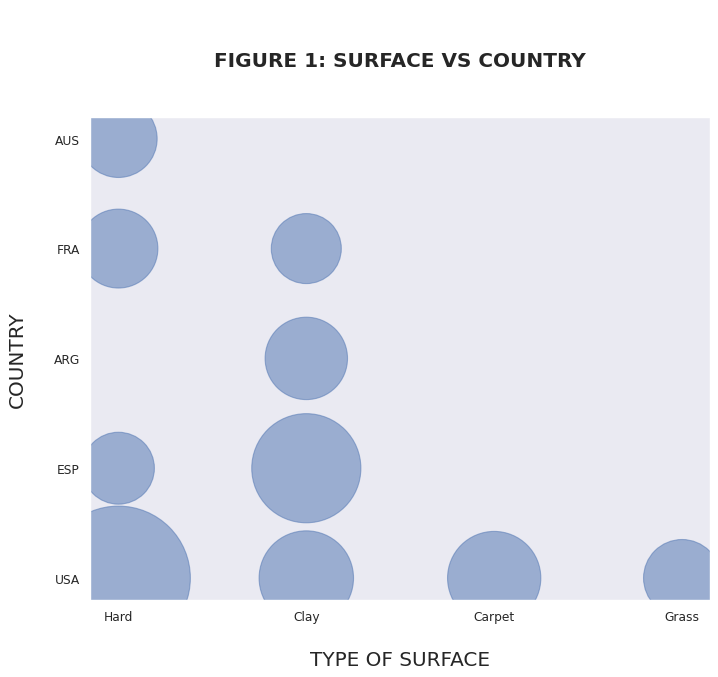

In [ ]:
new_male_data.winner_ioc.fillna('Test', inplace=True)
plt.figure(figsize=(10, 8), dpi=80)
plt_1 = new_male_data[['surface','winner_ioc','winner_id']].groupby(['surface','winner_ioc']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(10)

N = 50
x = plt_1['surface']
y = plt_1['winner_ioc']
s=plt_1['counts']
#colors = np.random.rand(len())

plt.scatter(x, y,s, alpha=0.5)

plt.title('\n\nFIGURE 1: SURFACE VS COUNTRY\n\n', fontweight='bold', fontsize=18)
plt.xlabel("\nTYPE OF SURFACE", fontsize=18)
plt.ylabel("COUNTRY\n", fontsize=18)

plt.show()

**The above graph gives a view of country vs surface which can help us understand which country plays better on which surface. This can help us understand where players of a certain country need to improve. Eg: USA plays very good on Hard surfaces as compared to Grass. This shows us that players in United States need to focus on Grass courts more.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


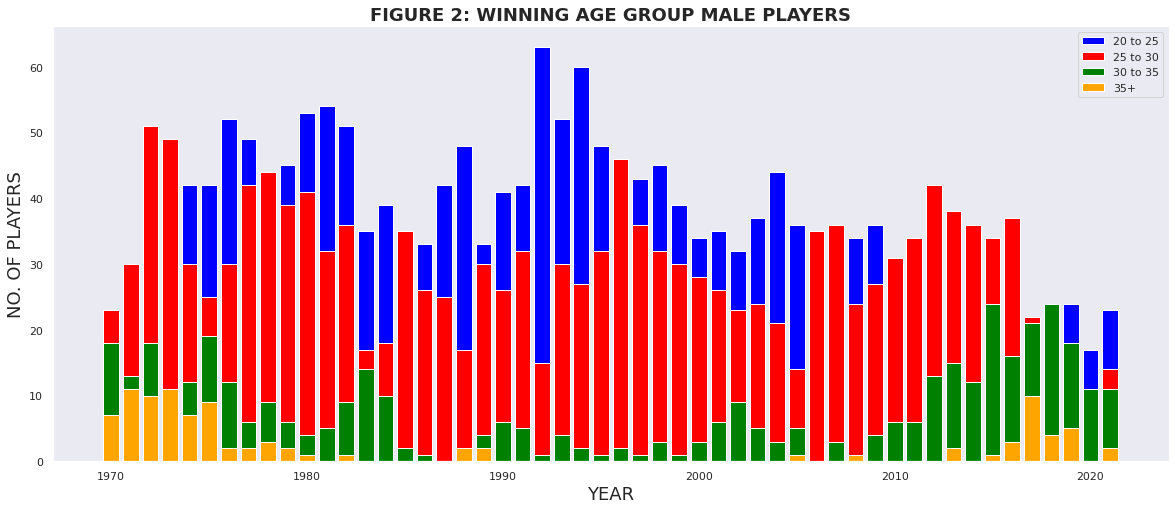

In [ ]:
mpl.rcParams['figure.figsize'] = (20,8)
plt_2 = new_male_data[new_male_data['round'] == 'F']

conditions = [
    (plt_2['winner_age'] >=20) & (plt_2['winner_age'] <25),
    (plt_2['winner_age'] >=25) & (plt_2['winner_age'] <30),
    (plt_2['winner_age'] >=30) & (plt_2['winner_age'] <35),
    (plt_2['winner_age'] >35)  ]

values = ['20 to 25', '25 to 30', '30 to 35', '35+']
plt_2['AgeGroup'] = np.select(conditions, values)
plt_2 = plt_2[['AgeGroup','tourney_date']]
plt_2['tourney_date'] = plt_2['tourney_date']//10000
plt_2 = plt_2.groupby(['AgeGroup','tourney_date']).size().reset_index(name='counts').sort_values('counts',ascending=False)
plt_2 = plt_2[plt_2['tourney_date'] >= 1970]

plt_2_1 = plt_2[plt_2['AgeGroup'] == '20 to 25']
plt_2_2 = plt_2[plt_2['AgeGroup'] == '25 to 30']
plt_2_3 = plt_2[plt_2['AgeGroup'] == '30 to 35']
plt_2_4 = plt_2[plt_2['AgeGroup'] == '35+']


plt.bar(plt_2_1['tourney_date'],plt_2_1['counts'],color = 'blue')
plt.bar(plt_2_2['tourney_date'],plt_2_2['counts'],color = 'red')
plt.bar(plt_2_3['tourney_date'],plt_2_3['counts'],color = 'green')
plt.bar(plt_2_4['tourney_date'],plt_2_4['counts'],color = 'orange')

plt.title('FIGURE 2: WINNING AGE GROUP MALE PLAYERS', fontweight='bold', fontsize=18)
plt.xlabel("YEAR", fontsize=18)
plt.ylabel("NO. OF PLAYERS", fontsize=18)

plt.legend(values)

plt.show()

**The above graph gives a view of age vs year of male players, which shows us which age group performed well given an year. The colors represent the following**

**1. Blue : Ages 20 to 25**

**2. Red: Ages 25 to 30**

**3. Green: Ages 30 to 35**

**4. Orange: Ages 35 and above**

**As we can see, players between the ages of 25 and 30 had consistent wins in games as compared to other age groups.**

**Age group 20 to 25 had some years with higher win percentage but weren't consistent for long.**

**Age groups 30 to 35 and 35 and above had the worst win percentages.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


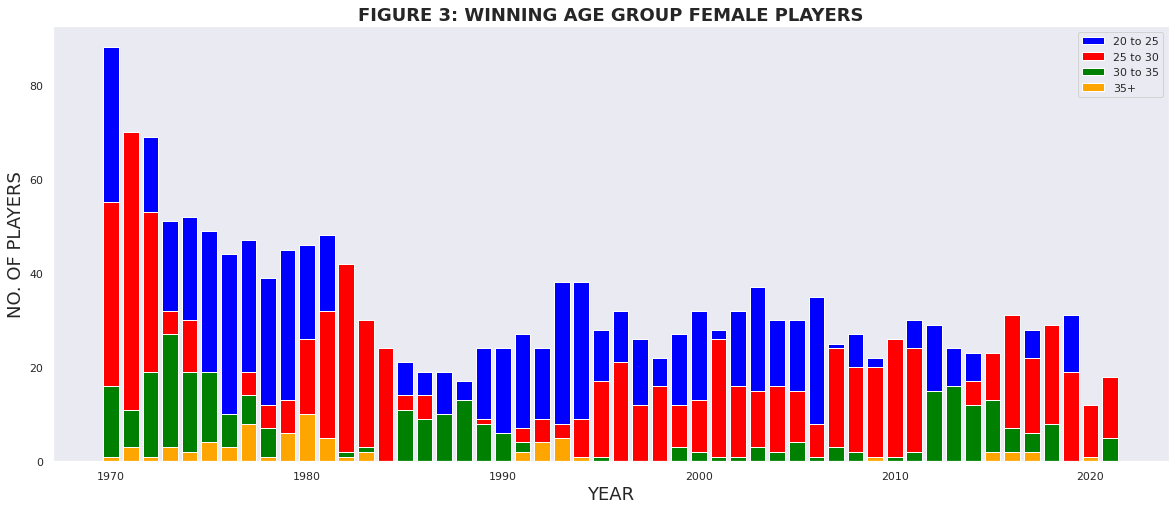

In [ ]:
mpl.rcParams['figure.figsize'] = (20,8)
plt_2 = new_female_data[new_female_data['round'] == 'F']

conditions = [
    (plt_2['winner_age'] >=20) & (plt_2['winner_age'] <25),
    (plt_2['winner_age'] >=25) & (plt_2['winner_age'] <30),
    (plt_2['winner_age'] >=30) & (plt_2['winner_age'] <35),
    (plt_2['winner_age'] >35)  ]

values = ['20 to 25', '25 to 30', '30 to 35', '35+']
plt_2['AgeGroup'] = np.select(conditions, values)
plt_2 = plt_2[['AgeGroup','tourney_date']]
plt_2['tourney_date'] = plt_2['tourney_date']//10000
plt_2 = plt_2.groupby(['AgeGroup','tourney_date']).size().reset_index(name='counts').sort_values('counts',ascending=False)
plt_2 = plt_2[plt_2['tourney_date'] >= 1970]

plt_2_1 = plt_2[plt_2['AgeGroup'] == '20 to 25']
plt_2_2 = plt_2[plt_2['AgeGroup'] == '25 to 30']
plt_2_3 = plt_2[plt_2['AgeGroup'] == '30 to 35']
plt_2_4 = plt_2[plt_2['AgeGroup'] == '35+']


plt.bar(plt_2_1['tourney_date'],plt_2_1['counts'],color = 'blue')
plt.bar(plt_2_2['tourney_date'],plt_2_2['counts'],color = 'red')
plt.bar(plt_2_3['tourney_date'],plt_2_3['counts'],color = 'green')
plt.bar(plt_2_4['tourney_date'],plt_2_4['counts'],color = 'orange')

plt.title('FIGURE 3: WINNING AGE GROUP FEMALE PLAYERS', fontweight='bold', fontsize=18)
plt.xlabel("YEAR", fontsize=18)
plt.ylabel("NO. OF PLAYERS", fontsize=18)

plt.legend(values)

plt.show()

**The above graph gives a view of age vs year of female players, which shows us which age group performed well given an year. The colors represent the following**

**1. Blue : Ages 20 to 25**

**2. Red: Ages 25 to 30**

**3. Green: Ages 30 to 35**

**4. Orange: Ages 35 and above**

**We can conclude that female players are more likely to win when they are in the age group of 20 to 25, not consistent, but this age group has the maximum wins overall.**

**Female players are leaste likely to play and win with age above 35.**

---

#**LET US NOW BEGIN OUR DESCRIPTIVE ANALYSIS**

**First let us look at our Datasets again**

In [ ]:
new_male_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176458 entries, 0 to 176457
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   tourney_name  176458 non-null  object 
 1   surface       176458 non-null  object 
 2   tourney_date  176458 non-null  int64  
 3   winner_id     176458 non-null  int64  
 4   winner_name   176458 non-null  object 
 5   winner_hand   176415 non-null  object 
 6   winner_ht     176458 non-null  float64
 7   winner_ioc    176458 non-null  object 
 8   winner_age    176458 non-null  float64
 9   loser_id      176458 non-null  int64  
 10  loser_name    176458 non-null  object 
 11  loser_hand    176351 non-null  object 
 12  loser_ht      176458 non-null  float64
 13  loser_ioc     176425 non-null  object 
 14  loser_age     176458 non-null  float64
 15  round         176458 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 21.5+ MB


In [ ]:
new_female_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143757 entries, 0 to 143756
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   tourney_name  143757 non-null  object 
 1   surface       143757 non-null  object 
 2   tourney_date  143757 non-null  int64  
 3   winner_id     143757 non-null  int64  
 4   winner_name   143757 non-null  object 
 5   winner_hand   143757 non-null  object 
 6   winner_ht     143757 non-null  float64
 7   winner_ioc    143732 non-null  object 
 8   winner_age    143757 non-null  float64
 9   loser_id      143757 non-null  int64  
 10  loser_name    143757 non-null  object 
 11  loser_hand    143757 non-null  object 
 12  loser_ht      143757 non-null  float64
 13  loser_ioc     143616 non-null  object 
 14  loser_age     143757 non-null  float64
 15  round         143757 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 17.5+ MB


#**METHOD 1: MEASURES OF FREQUENCY**

In descriptive analysis, it is essential to know how frequently a certain event or response is likely to occur. This is the prime purpose of measures of frequency to make like a count or percent.

**Let us see how frequently certain variables feature in our datasets**

In [ ]:
frequency_male = new_male_data['surface'].value_counts(dropna=False)
frequency_male

Hard             70741
Clay             63504
Carpet           20148
Grass            19576
Not Mentioned     2489
Name: surface, dtype: int64

In [ ]:
frequency_female = new_female_data['surface'].value_counts(dropna=False)
frequency_female

Hard             60198
Clay             44653
Grass            20541
Carpet           13682
Not Mentioned     4683
Name: surface, dtype: int64

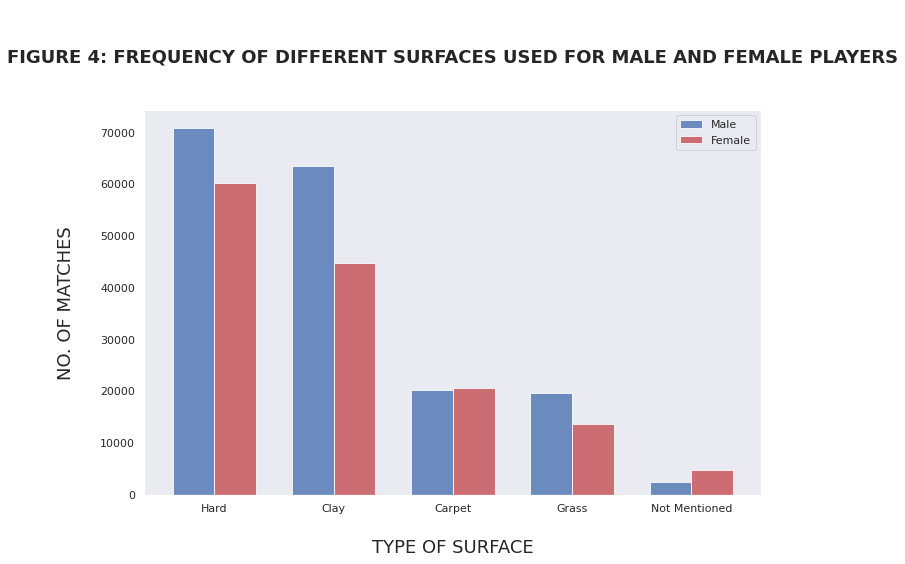

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)

n_groups = 5

values = ['Hard','Clay','Carpet','Grass','Not Mentioned']
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, frequency_male, bar_width,
alpha=opacity,
color='b',
label='Male')

rects2 = plt.bar(index + bar_width, frequency_female, bar_width,
alpha=opacity,
color='r',
label='Female')

plt.xlabel("\nTYPE OF SURFACE", fontsize= 18)
plt.ylabel("NO. OF MATCHES\n", fontsize=18)
plt.title("\n\nFIGURE 4: FREQUENCY OF DIFFERENT SURFACES USED FOR MALE AND FEMALE PLAYERS\n\n", fontweight = 'bold', fontsize=18)
plt.xticks(index + (bar_width/2), values)
plt.legend()

plt.tight_layout()
plt.show()

**The above values show us that the 'Hard' type of surface is the most used for playing the game.**
**But just knowing that doesn't tell us a lot about how each country performs on those surfaces.**

**Let us find out the winner and loser counts for each country on each surface.** 

In [ ]:
count = new_male_data.groupby(['winner_ioc','surface']).size()
print(count.to_markdown())

|                          |     0 |
|:-------------------------|------:|
| ('AHO', 'Clay')          |     3 |
| ('AHO', 'Hard')          |    26 |
| ('ALG', 'Clay')          |    40 |
| ('ALG', 'Hard')          |    10 |
| ('AND', 'Carpet')        |     3 |
| ('ARG', 'Carpet')        |   248 |
| ('ARG', 'Clay')          |  5502 |
| ('ARG', 'Grass')         |   309 |
| ('ARG', 'Hard')          |  1921 |
| ('ARG', 'Not Mentioned') |    17 |
| ('ARM', 'Carpet')        |    17 |
| ('ARM', 'Clay')          |    45 |
| ('ARM', 'Grass')         |    28 |
| ('ARM', 'Hard')          |    68 |
| ('AUS', 'Carpet')        |  1525 |
| ('AUS', 'Clay')          |  2786 |
| ('AUS', 'Grass')         |  3393 |
| ('AUS', 'Hard')          |  4857 |
| ('AUS', 'Not Mentioned') |   303 |
| ('AUT', 'Carpet')        |   142 |
| ('AUT', 'Clay')          |  1468 |
| ('AUT', 'Grass')         |   149 |
| ('AUT', 'Hard')          |   826 |
| ('AUT', 'Not Mentioned') |    30 |
| ('BAH', 'Carpet')        |     9 |
|

In [ ]:
count = new_male_data.groupby(['loser_ioc','surface']).size()
print(count.to_markdown())

|                          |     0 |
|:-------------------------|------:|
| ('AHO', 'Carpet')        |     4 |
| ('AHO', 'Clay')          |    25 |
| ('AHO', 'Hard')          |    22 |
| ('ALG', 'Carpet')        |     4 |
| ('ALG', 'Clay')          |    89 |
| ('ALG', 'Hard')          |    17 |
| ('AND', 'Carpet')        |     5 |
| ('ARG', 'Carpet')        |   293 |
| ('ARG', 'Clay')          |  4439 |
| ('ARG', 'Grass')         |   375 |
| ('ARG', 'Hard')          |  2046 |
| ('ARG', 'Not Mentioned') |     9 |
| ('ARM', 'Carpet')        |    19 |
| ('ARM', 'Clay')          |    64 |
| ('ARM', 'Grass')         |    30 |
| ('ARM', 'Hard')          |   107 |
| ('AUS', 'Carpet')        |  1747 |
| ('AUS', 'Clay')          |  3180 |
| ('AUS', 'Grass')         |  3060 |
| ('AUS', 'Hard')          |  5039 |
| ('AUS', 'Not Mentioned') |   219 |
| ('AUT', 'Carpet')        |   238 |
| ('AUT', 'Clay')          |  1265 |
| ('AUT', 'Grass')         |   217 |
| ('AUT', 'Hard')          |   914 |
|

**The above values give us more information on how each country performs on different type of surface.**

**For example, for USA**

**The counts for each type of surface for winning players and losing players in the Male Dataset are:**

**Carpet: 7048 wins, 5975 losses**

**Clay: 7225 wins, 7413 losses**

**Grass: 4809, wins, 4272 losses**

**Hard: 16769 wins, 14717 losses**

In [ ]:
count = new_female_data.groupby(['winner_ioc','surface']).size()
print(count.to_markdown())

|                          |     0 |
|:-------------------------|------:|
| ('ALG', 'Clay')          |    26 |
| ('ALG', 'Hard')          |    11 |
| ('ANG', 'Clay')          |     1 |
| ('ANG', 'Hard')          |     4 |
| ('ANT', 'Clay')          |     2 |
| ('ANT', 'Hard')          |     5 |
| ('ARG', 'Carpet')        |   146 |
| ('ARG', 'Clay')          |  1498 |
| ('ARG', 'Grass')         |   183 |
| ('ARG', 'Hard')          |   881 |
| ('ARG', 'Not Mentioned') |    51 |
| ('ARM', 'Clay')          |    34 |
| ('ARM', 'Hard')          |    11 |
| ('ARM', 'Not Mentioned') |     1 |
| ('AUS', 'Carpet')        |  1144 |
| ('AUS', 'Clay')          |  2444 |
| ('AUS', 'Grass')         |  3477 |
| ('AUS', 'Hard')          |  2776 |
| ('AUS', 'Not Mentioned') |   387 |
| ('AUT', 'Carpet')        |   160 |
| ('AUT', 'Clay')          |   796 |
| ('AUT', 'Grass')         |    98 |
| ('AUT', 'Hard')          |   736 |
| ('AUT', 'Not Mentioned') |    31 |
| ('AZE', 'Carpet')        |    18 |
|

In [ ]:
count = new_female_data.groupby(['loser_ioc','surface']).size()
print(count.to_markdown())

|                          |     0 |
|:-------------------------|------:|
| ('ALG', 'Clay')          |    42 |
| ('ALG', 'Hard')          |    16 |
| ('AND', 'Clay')          |     1 |
| ('ANG', 'Clay')          |     1 |
| ('ANG', 'Hard')          |     6 |
| ('ANT', 'Clay')          |    20 |
| ('ANT', 'Hard')          |    23 |
| ('ARG', 'Carpet')        |   153 |
| ('ARG', 'Clay')          |  1257 |
| ('ARG', 'Grass')         |   213 |
| ('ARG', 'Hard')          |   886 |
| ('ARG', 'Not Mentioned') |    60 |
| ('ARM', 'Carpet')        |     1 |
| ('ARM', 'Clay')          |    44 |
| ('ARM', 'Hard')          |     5 |
| ('ARM', 'Not Mentioned') |     1 |
| ('AUS', 'Carpet')        |   869 |
| ('AUS', 'Clay')          |  2191 |
| ('AUS', 'Grass')         |  3143 |
| ('AUS', 'Hard')          |  2967 |
| ('AUS', 'Not Mentioned') |   368 |
| ('AUT', 'Carpet')        |   194 |
| ('AUT', 'Clay')          |   855 |
| ('AUT', 'Grass')         |   139 |
| ('AUT', 'Hard')          |   860 |
|

**In the same way, the counts for each type of surface for winning players and losing players in the Female Dataset for USA are:**

**Carpet: 5308 wins, 5085 losses**

**Clay: 6940 wins, 6966 losses**

**Grass: 5655, wins, 4906 losses**

**Hard: 13686 wins, 12701 losses**

**This shows us that even though USA has played maximum matches on the 'Hard' type of surface, the type of surface does not give us any insight into the reason for wins or losses for USA.**

**Hence we continue our analysis**

#**METHOD 2: MEASURES OF CENTRAL TENDENCY**

In descriptive analysis, it is also important to find out the Central (or average) Tendency or response. Central Tendency is measured with the use of three averages – mean, median, and mode.

In [ ]:
print ('The mean age of winning male players is:')
print(new_male_data['winner_age'].mean())
print('\n')
print ('The mean age of winning female players is:')
print(new_female_data['winner_age'].mean())

The mean age of winning male players is:
25.679200977186557


The mean age of winning female players is:
23.521973195197248


**The above mean values tell us that male players around the age of 25 have maximum chances of winning a match, while female players around the age of 23 have the maximum chance.**

**These values can also be verified with the *figure 2* and *figure 3* respectively which also concluded that male players between the age of 25-30 had higher win percentage and female players between the age of 20-25 had higher win percentage.**

In [ ]:
print ('The median height of winning male players is:')
print(new_male_data['winner_ht'].median())
print('\n')
print ('The median height of winning female players is:')
print(new_female_data['winner_ht'].median())

The median height of winning male players is:
184.44958813318604


The median height of winning female players is:
172.67121962417605


**The above measure of median tells us that Male Players have a prevalent height of 184cms and female players have a common height of 172 cms.**

#**MEASURES OF DISPERSION**

Sometimes, it is important to know how data is divided across a range.

In [ ]:
print('The variance is:')
print(new_male_data['winner_age'].var())
print('\n')
print('The standard deviation is:')
print(new_male_data['winner_age'].std())

The variance is:
15.793947012813888


The standard deviation is:
3.974159912838673


In [ ]:
print('The variance is:')
print(new_female_data['winner_age'].var())
print('\n')
print('The standard deviation is:')
print(new_female_data['winner_age'].std())

The variance is:
18.298976677056928


The standard deviation is:
4.277730318411497


**The variance is the average of the squared differences from the mean. A high variance tells us that the values in our dataset are far from their mean. So, our data will have high levels of variability. On the other hand, a low variance tells us that the values are quite close to the mean. In this case, the data will have low levels of variability.**

**Standard deviation is a statistic that looks at how far from the mean a group of numbers is, by using the square root of the variance. The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from canceling out those below, which would result in a variance of zero.**

**Therefore, according to our variance and standard devaition values we can say that our dataset is concentrated around the mean values and there are not many outliers in it.**

In [ ]:
new_male_data.skew()

tourney_date     0.127002
winner_id       10.175195
winner_ht        0.214272
winner_age       0.540010
loser_id         8.528780
loser_ht         0.198738
loser_age        0.539691
cluster          0.334470
dtype: float64

In [ ]:
new_female_data.skew()

tourney_date   -0.006941
winner_id       4.682358
winner_ht      -0.493900
winner_age      0.590299
loser_id        3.447223
loser_ht       -1.465969
loser_age       0.663447
cluster        -0.045489
dtype: float64

**The skew value tells us whether our data is symmetric or not. A value less than -1 is skewed to the left; that greater than 1 is skewed to the right. A value between -1 and 1 is symmetric.**

**We can see that the Male Dataset is symmetric with values being between -1 and 1, while the Female Dataset might be skewed to the left a little since the value for loser_ht is less than -1.**

#**MEASURES OF POSITION**

Descriptive analysis also involves identifying the position of a single value or its response in relation to others.

In [ ]:
print("Q1 quantile of Winning Male Players height : ", np.quantile(new_male_data['winner_ht'], .25, interpolation='midpoint'))
print("Q2 quantile of Winning Male Players height : ", np.quantile(new_male_data['winner_ht'], .50, interpolation='midpoint'))
print("Q3 quantile of Winning Male Players height : ", np.quantile(new_male_data['winner_ht'], .75, interpolation='midpoint'))
print("Q4 quantile of Winning Male Players height : ", np.quantile(new_male_data['winner_ht'], 1.0, interpolation='midpoint'))

Q1 quantile of Winning Male Players height :  180.0
Q2 quantile of Winning Male Players height :  184.44958813318604
Q3 quantile of Winning Male Players height :  188.0
Q4 quantile of Winning Male Players height :  211.0


**This measure tells us that male players need to have a height of 6ft and above to be in the top 25%.**

In [ ]:
print("Q1 quantile of Winning Female Players height : ", np.quantile(new_female_data['winner_ht'], .25, interpolation='midpoint'))
print("Q2 quantile of Winning Female Players height : ", np.quantile(new_female_data['winner_ht'], .50, interpolation='midpoint'))
print("Q3 quantile of Winning Female Players height : ", np.quantile(new_female_data['winner_ht'], .75, interpolation='midpoint'))
print("Q4 quantile of Winning Female Players height : ", np.quantile(new_female_data['winner_ht'], 1.0, interpolation='midpoint'))

Q1 quantile of Winning Female Players height :  172.67121962417605
Q2 quantile of Winning Female Players height :  172.67121962417605
Q3 quantile of Winning Female Players height :  172.67121962417605
Q4 quantile of Winning Female Players height :  189.0


**This measure tells us that female players need to have a height of 5.6ft and above to be in the top 25%.**

#**CONTINGENCY TABLE**

In a contingency table, each cell represents the combination of the two variables. You need to read across the table to witness how the two variables i.e., independent, and dependent variables relate to each other.

**First lets add a column to our datasets dividing the winner ages into various groups.**

In [ ]:
conditions = [
    (new_male_data['winner_age'] <20),
    (new_male_data['winner_age'] >=20) & (new_male_data['winner_age'] <25),
    (new_male_data['winner_age'] >=25) & (new_male_data['winner_age'] <30),
    (new_male_data['winner_age'] >=30) & (new_male_data['winner_age'] <35),
    (new_male_data['winner_age'] >35)  ]

values = ['0 to 20', '20 to 25', '25 to 30', '30 to 35', '35+']


new_male_data['age_group'] = np.select(conditions, values)


new_male_data.head()

,tourney_name,surface,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round,age_group,cluster,c
0,Dublin,Grass,19700706,100106,Graham Stilwell,R,173.000000,GBR,24.637919,125672,Kenneth Reid,U,184.217894,IRL,25.733056,R32,20 to 25,1,#81DF20
1,Dublin,Grass,19700706,209533,Harry Sheridan,U,184.449588,IRL,25.679201,209675,B Sweeney,U,184.217894,IRL,25.733056,R32,25 to 30,1,#81DF20
2,Dublin,Grass,19700706,100100,Tony Roche,L,178.000000,AUS,25.136208,125716,James Buckley,U,184.217894,IRL,33.223819,R32,25 to 30,3,#9496E6
3,Dublin,Grass,19700706,100060,Marty Riessen,R,185.000000,USA,28.585900,209674,Frank Mcardle,U,184.217894,IRL,25.733056,R32,25 to 30,1,#81DF20
4,Dublin,Grass,19700706,100084,Tom Okker,R,178.000000,NED,26.368241,209673,T Grane,U,184.217894,NaN,25.733056,R32,25 to 30,1,#81DF20


In [ ]:
conditions = [
    (new_female_data['winner_age'] <20),
    (new_female_data['winner_age'] >=20) & (new_female_data['winner_age'] <25),
    (new_female_data['winner_age'] >=25) & (new_female_data['winner_age'] <30),
    (new_female_data['winner_age'] >=30) & (new_female_data['winner_age'] <35),
    (new_female_data['winner_age'] >35)  ]

values = ['0 to 20', '20 to 25', '25 to 30', '30 to 35', '35+']


new_female_data['age_group'] = np.select(conditions, values)


new_female_data.head()

,tourney_name,surface,tourney_date,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round,age_group,cluster,c
0,Australian Open,Grass,19700119,200198,Caroline Langsford,U,172.67122,AUS,23.521973,200199,Sally Irvine,U,172.294313,AUS,23.44497,R64,20 to 25,0,#DF2020
1,Australian Open,Grass,19700119,200188,Helen Amos,U,172.67122,AUS,21.555099,200172,Caroline Cooper,U,172.294313,AUS,23.44497,R64,20 to 25,3,#9496E6
2,Australian Open,Grass,19700119,200200,Norma Marsh,U,172.67122,AUS,34.017796,200201,Sharon Thomson,U,172.294313,AUS,23.44497,R64,30 to 35,4,#94F2E6
3,Australian Open,Grass,19700119,200203,Vicki Lancaster Kerr,U,172.67122,AUS,18.981520,200202,Theresa Van Haren,U,172.294313,AUS,23.44497,R64,0 to 20,3,#9496E6
4,Australian Open,Grass,19700119,200204,Sandra Walsham,U,172.67122,AUS,23.521973,200205,Judy Harris,U,172.294313,AUS,23.44497,R64,20 to 25,0,#DF2020


In [ ]:
male_age_hand = pd.crosstab([new_male_data.winner_hand],new_male_data.age_group, margins = False)
print(male_age_hand.to_markdown())

| winner_hand   |   0 to 20 |   20 to 25 |   25 to 30 |   30 to 35 |   35+ |
|:--------------|----------:|-----------:|-----------:|-----------:|------:|
| L             |      1414 |       9578 |       9869 |       4249 |   618 |
| R             |      8450 |      61772 |      58787 |      17506 |  2574 |
| U             |       200 |        584 |        683 |        111 |    20 |


Text(66.25, 0.5, 'WINNER_HAND\n')

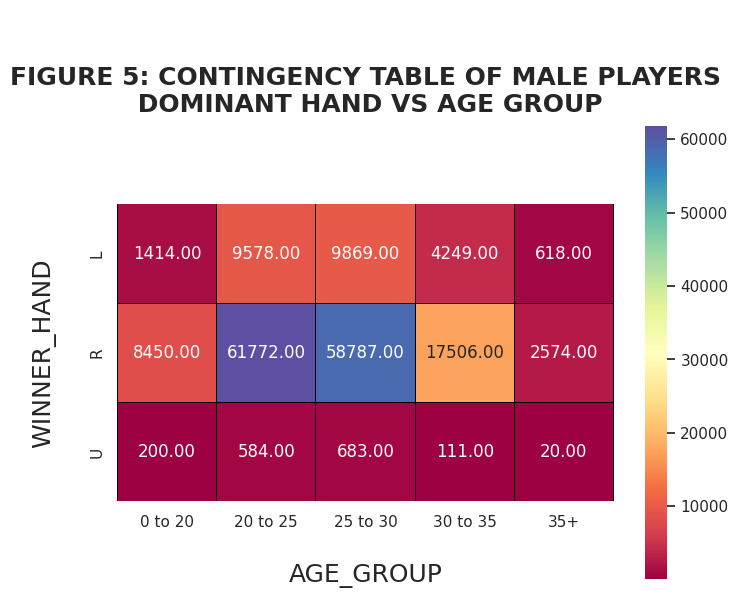

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='#000000')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(male_age_hand, annot=True, fmt='.2f', cmap='Spectral', cbar_kws={"orientation": "vertical"}, linewidth= 0.01, linecolor='#000000')

plt.title('\n\nFIGURE 5: CONTINGENCY TABLE OF MALE PLAYERS\n DOMINANT HAND VS AGE GROUP\n\n\n', fontweight='bold', fontsize=18)
plt.xlabel('\nAGE_GROUP', fontsize=18)
plt.ylabel('WINNER_HAND\n', fontsize=18)

In [ ]:
female_age_hand = pd.crosstab([new_female_data.winner_hand],new_female_data.age_group, margins = False)
print(female_age_hand.to_markdown())

| winner_hand   |   0 to 20 |   20 to 25 |   25 to 30 |   30 to 35 |   35+ |
|:--------------|----------:|-----------:|-----------:|-----------:|------:|
| L             |      1916 |       3803 |       3091 |        856 |   295 |
| R             |     18359 |      40074 |      27107 |       7238 |   838 |
| U             |     11346 |      19738 |       7653 |       1186 |   257 |


Text(66.25, 0.5, 'WINNER_HAND\n')

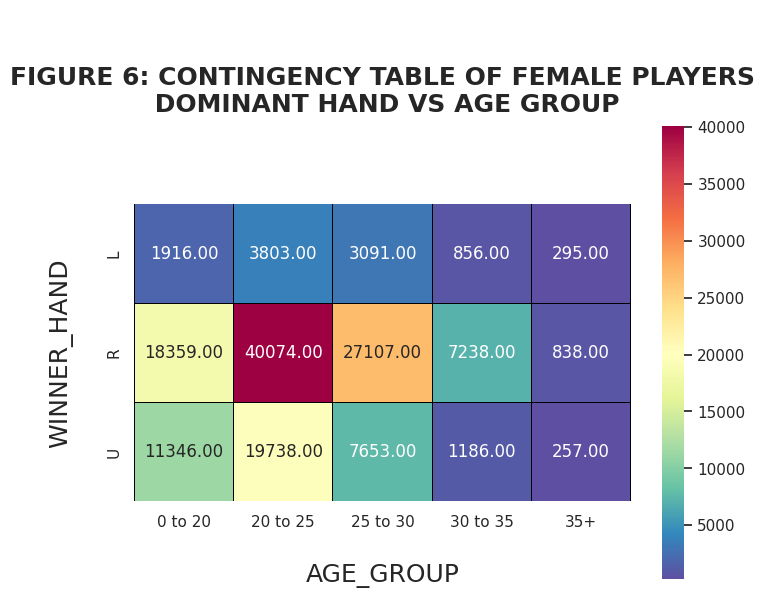

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='#000000')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(female_age_hand, annot=True, fmt='.2f', cmap='Spectral_r', cbar_kws={"orientation": "vertical"}, linewidth= 0.01, linecolor='#000000')

plt.title('\n\nFIGURE 6: CONTINGENCY TABLE OF FEMALE PLAYERS\n DOMINANT HAND VS AGE GROUP\n\n\n', fontweight='bold', fontsize=18)
plt.xlabel('\nAGE_GROUP', fontsize=18)
plt.ylabel('WINNER_HAND\n', fontsize=18)

#**K-MEANS CLUSTERING**

In [ ]:
df1 = new_male_data
df2 = new_female_data

**First, for the Male Players Dataset**

In [ ]:
kmeans1_1 = KMeans(n_clusters=5, random_state=0)
df1['cluster'] = kmeans1_1.fit_predict(df1[['winner_age', 'winner_ht']])

colors = ['#DF2020', '#81DF20', '#2095DF', '#9496E6', '#94F2E6']
df1['c'] = df1.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

Text(0, 0.5, 'WINNER_HT\n')

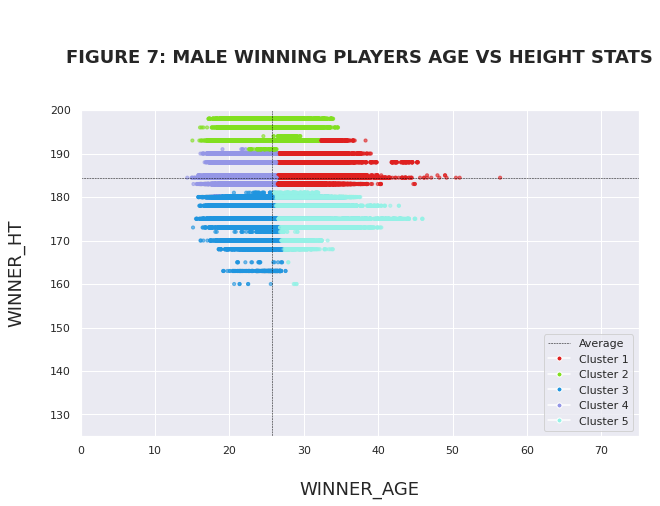

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))

plt.scatter(df1.winner_age, df1.winner_ht, c=df1.c, alpha = 0.6, s=10)

plt.plot([df1.winner_age.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)

plt.plot([0,200], [df1.winner_ht.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)

legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]

cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

legend_elements.extend(cluster_leg)

plt.legend(handles=legend_elements, loc='lower right', ncol=1)

ax.set_xlim([0,75])
ax.set_ylim([125,200])

plt.title('\n\nFIGURE 7: MALE WINNING PLAYERS AGE VS HEIGHT STATS\n\n', fontweight='bold', fontsize=18)
plt.xlabel('\nWINNER_AGE', fontsize=18)
plt.ylabel('WINNER_HT\n', fontsize=18)

In [ ]:
kmeans1_2 = KMeans(n_clusters=5, random_state=0)
df1['cluster'] = kmeans1_2.fit_predict(df1[['loser_age', 'loser_ht']])

colors = ['#DF2020', '#81DF20', '#2095DF', '#9496E6', '#94F2E6']
df1['c'] = df1.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

Text(0, 0.5, 'LOSER_HT\n')

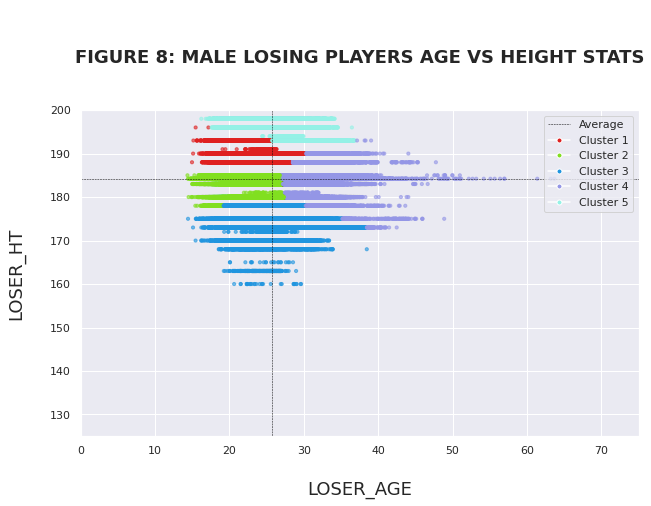

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))

plt.scatter(df1.loser_age, df1.loser_ht, c=df1.c, alpha = 0.6, s=10)

plt.plot([df1.loser_age.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)

plt.plot([0,200], [df1.loser_ht.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)

legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]

cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

legend_elements.extend(cluster_leg)

plt.legend(handles=legend_elements, loc='upper right', ncol=1)

ax.set_xlim([0,75])
ax.set_ylim([125,200])

plt.title('\n\nFIGURE 8: MALE LOSING PLAYERS AGE VS HEIGHT STATS\n\n', fontweight='bold', fontsize=18)
plt.xlabel('\nLOSER_AGE', fontsize=18)
plt.ylabel('LOSER_HT\n', fontsize=18)

**Now for the Female Players Dataset**

In [ ]:
kmeans2_1 = KMeans(n_clusters=5, random_state=0)
df2['cluster'] = kmeans2_1.fit_predict(df2[['winner_age', 'winner_ht']])

colors = ['#DF2020', '#81DF20', '#2095DF', '#9496E6', '#94F2E6']
df2['c'] = df2.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

Text(0, 0.5, 'WINNER_HT\n')

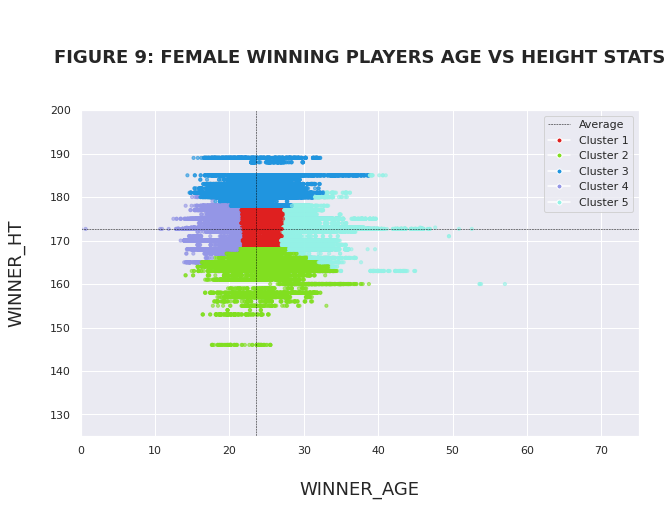

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))

plt.scatter(df2.winner_age, df2.winner_ht, c=df2.c, alpha = 0.6, s=10)

plt.plot([df2.winner_age.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)

plt.plot([0,200], [df2.winner_ht.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)

legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]

cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

legend_elements.extend(cluster_leg)

plt.legend(handles=legend_elements, loc='upper right', ncol=1)

ax.set_xlim([0,75])
ax.set_ylim([125,200])

plt.title('\n\nFIGURE 9: FEMALE WINNING PLAYERS AGE VS HEIGHT STATS\n\n', fontweight='bold', fontsize=18)
plt.xlabel('\nWINNER_AGE', fontsize=18)
plt.ylabel('WINNER_HT\n', fontsize=18)

In [ ]:
kmeans2_2 = KMeans(n_clusters=5, random_state=0)
df2['cluster'] = kmeans2_2.fit_predict(df2[['loser_age', 'loser_ht']])

centroids = kmeans2_2.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df2['cen_x'] = df2.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df2['cen_y'] = df2.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF', '#9496E6', '#94F2E6']
df2['c'] = df2.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

Text(0, 0.5, 'LOSER_HT\n')

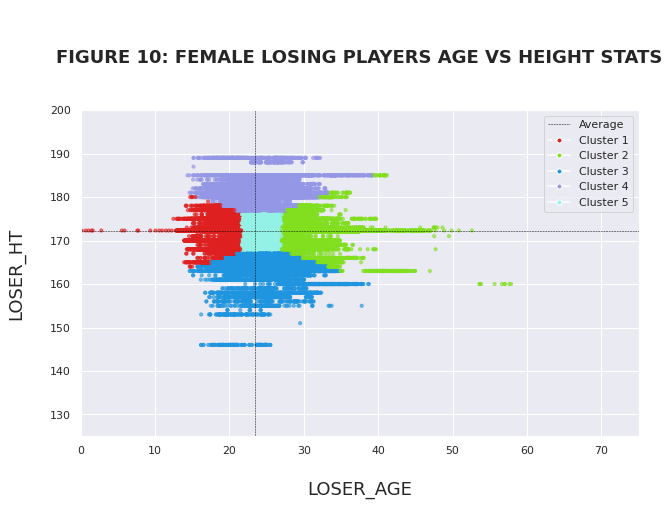

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(10,6))

plt.scatter(df2.loser_age, df2.loser_ht, c=df2.c, alpha = 0.6, s=10)

plt.plot([df2.loser_age.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)

plt.plot([0,200], [df2.loser_ht.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)

legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]

cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

legend_elements.extend(cluster_leg)

plt.legend(handles=legend_elements, loc='upper right', ncol=1)

ax.set_xlim([0,75])
ax.set_ylim([125,200])

plt.title('\n\nFIGURE 10: FEMALE LOSING PLAYERS AGE VS HEIGHT STATS\n\n', fontweight='bold', fontsize=18)
plt.xlabel('\nLOSER_AGE', fontsize=18)
plt.ylabel('LOSER_HT\n', fontsize=18)